# Исследование закономерностей продаж видео игр интернет-магазина

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель проекта:**

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Структура проекта**

**1. Обзор данных**
* посмотресть на набор данных
* сделать предварительные выводы

**2. Предобработка данных**
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
- *Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;*
- *Опишите причины, которые могли привести к пропускам;*
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**3. Исследовательский анализ данных**
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**5. Проверка гипотез**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

**6. Общий вывод**

**Оглавление:**

1. [Импорт и загрузка данных](#section_id)

2. [Предобработка данных](#section_id2)

3. [Исследовательский анализ данных](#section_id3)

4. [Портрет пользователя](#section_id4)

5. [Проверка гипотез](#section_id5)

## Импорт библиотек и загрузка данных
<a id='section_id'></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import copy

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Обзор данных

In [6]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.tail(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**

При обзоре данных выявлены следующие аномалии в столбцах:
* `Name` - есть два пропуска, при предобработке посмотрю на эти строки, предполагаю, некритично
* `Year_of_Release` - пропуски в дате релиза и тип данных с плавающей точкой, для перевода в целочисленный тип нужно будет обработать пропуски
* `Genre` - есть два пропуска, при предобработке посмотрю на эти строки, предполагаю, некритично
* `Critic_Score` - примерно в половине датафрейма пропуски, посмотрю что с ними можно сделать и нужно ли, заменю тип данных на целочисленный
* `User_Score` - много пропусков и некорректный формат, при предобработке необходимо будет обратить внимание
* `Rating` - много пропусков, посмотрю более детально на данные и решу что с ними делать

## Предобработка данных
<a id='section_id2'></a>

In [11]:
# Приведу все названия колонок к нижнему регистру:
data.columns = data.columns.str.lower()
# Также приведу содержимое всех текстовых столбцов к нижнему регистру: 
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

In [12]:
# Проверю наличие явных дубликатов:
data.duplicated().sum()

0

### Обработка пропусков 

In [13]:
# Посмотрю на пропуске в колонке 'name'
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Два строки, по ним же пропуски в колонке `genre`. Удалю эти строки, это не должно повлиять на дальнейший анализ.

In [14]:
#Удаление строк с пропусками в колонке 'name', одновременно удалятся пропуски в колонке 'genre'
data.dropna(subset=['name'], inplace=True)

#проверю как отработал код:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
# посмотрю на пропуски в колонке 'year_of_release'
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.00,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.00,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.00,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.00,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.00,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.00,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Потенциально можно вычленить год из названия некоторых игр и проставить его в колонку год выпуска. Но это не решит всю проблему.
Посмотрю долю пропусков от всей популяции.

In [16]:
# посмотрю на перечень платформ с пропусками в колонке 'year_of_release'
data.query('year_of_release.isnull()').pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values(by='name', ascending=False)

,name
platform,
ps2,34
wii,34
ds,30
x360,30
ps3,25
xb,21
2600,17
pc,17
psp,16


In [17]:
# Доля пропусков в колонке 'year_of_release' от всей популяции:
data['year_of_release'].isnull().sum() / data['year_of_release'].isnull().count() * 100

1.6095255190570215

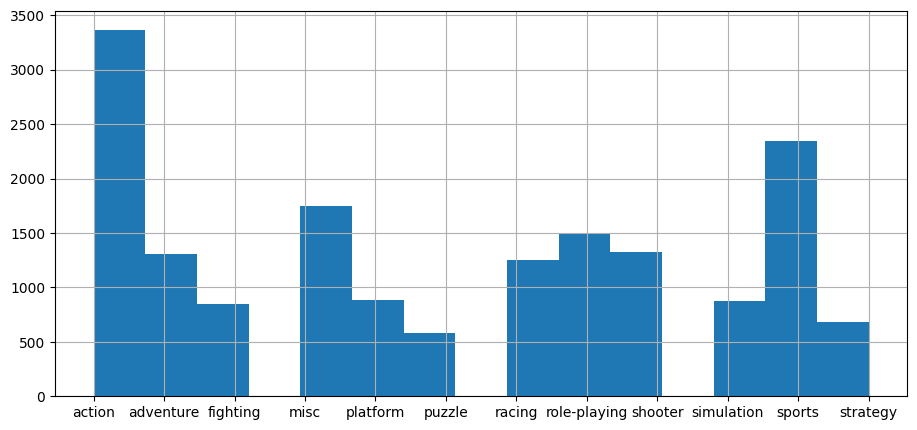

In [18]:
# Выведу гистрограмму распределения игр по жанрам во всей популяции
data['genre'].sort_values().hist(bins=15, figsize=(11, 5))
plt.show()

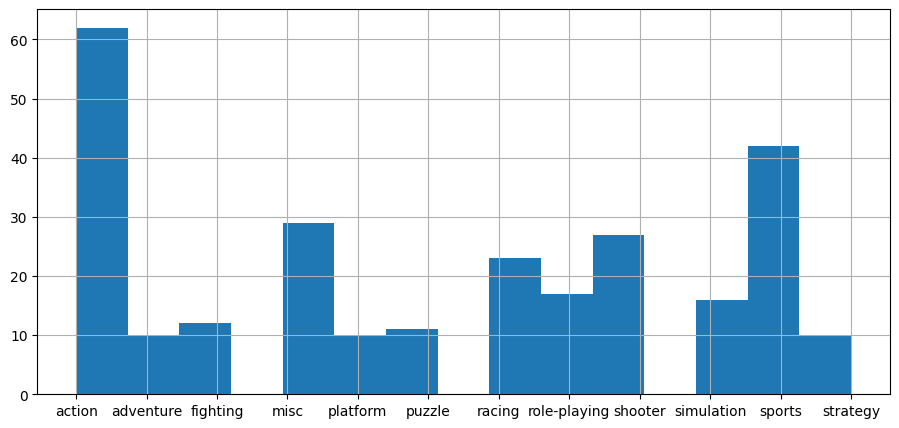

In [19]:
# Посмотрю как распределяются на гистограмме жанры по датафрейму с пропусками в колонке 'year_of_release'

data[data['year_of_release'].isnull()]['genre'].sort_values().hist(bins=15, figsize=(11, 5))
plt.show()

In [20]:
# Доля пропусков составляет 1.6% от популяции, распределение игр по жанрам на двух графиках выглядит похожим
# предлагаю удалить данные строки с пропусками
data.dropna(subset=['year_of_release'], inplace=True)

# Проверю как отработал код:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [22]:
# Посмотрю на уникальные значения в колонке 'user_score':
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [23]:
# Есть пропуски - 'nan', а также значения 'tbd', которое упомянуто в задании
#Заменю nan на -1, так как значения 0 уже есть в пользовательской оценке
data['user_score'] = data['user_score'].fillna(-1)
# Проверка кода:
data[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


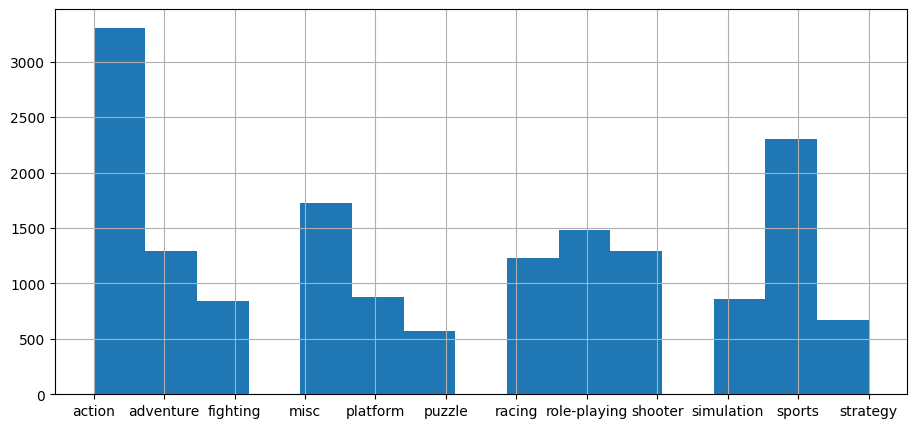

In [24]:
# Посмотрю более детально на значения'tbd':
# Для начала посмотрю количество игр по жанрам во всей популяции:
data['genre'].sort_values().hist(bins=15, figsize=(11, 5))
plt.show()

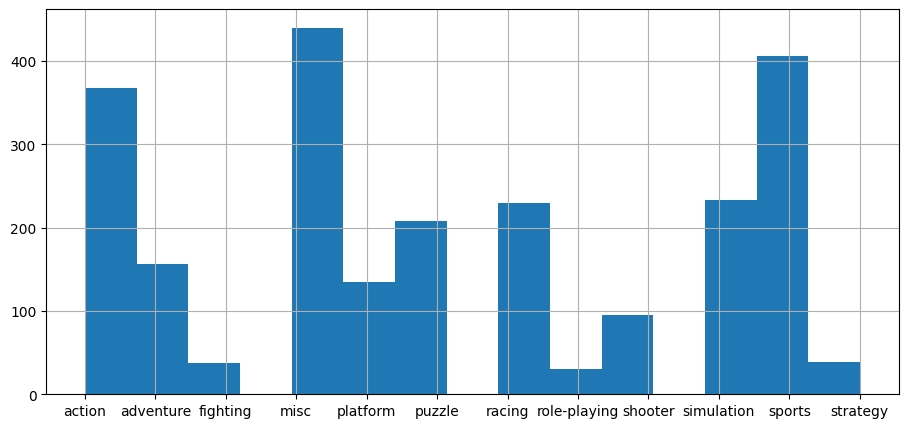

In [25]:
# Выведу аналогичную информацию по оценке 'tbd':
data.query('user_score == "tbd"').sort_values(by='genre')['genre'].hist(bins=15, figsize=(11, 5))
plt.show()

Распределение игр отличается. Дополнительно узнал, оценка 'tbd' значит to be determined, выставляется системой, если количество оценок небольшое. Аналогичная история есть у сайта Кинопоиск. Таким образом, данное значение является нормальным для датафрейма, но для проведения анализа от него нужно избавиться.

In [26]:
# Заменю 'tbd' на пропуски:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
# Пропуски, бывшие ранее значениями 'tdb' заменю на -2
data['user_score'] = data['user_score'].fillna(-2)

Таким образом в текущем датафрейме в колонке `user_score`:
* -1 - это изначальные пропуски
* -2 - изначальные 'tdb'

In [27]:
# Посмотрю на уникальные значения в колонке 'critic_score':
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [28]:
# Заменю пропуски на значения -1, чтобы в дальнейшем преобразовать тип данных в целочисленный
data['critic_score'] = data['critic_score'].fillna(-1)

In [29]:
# Посмотрю на датафрейм с пропусками в колонке 'rating':
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,-1.00,-1,NaN
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,-1.00,-1,NaN
5,tetris,gb,"1,989.00",puzzle,23.20,2.26,4.22,0.58,-1.00,-1,NaN
9,duck hunt,nes,"1,984.00",shooter,26.93,0.63,0.28,0.47,-1.00,-1,NaN
10,nintendogs,ds,"2,005.00",simulation,9.05,10.95,1.93,2.74,-1.00,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,"2,016.00",action,0.00,0.00,0.01,0.00,-1.00,-1,NaN
16711,lma manager 2007,x360,"2,006.00",sports,0.00,0.01,0.00,0.00,-1.00,-1,NaN
16712,haitaka no psychedelica,psv,"2,016.00",adventure,0.00,0.00,0.01,0.00,-1.00,-1,NaN
16713,spirits & spells,gba,"2,003.00",platform,0.01,0.00,0.00,0.00,-1.00,-1,NaN


In [30]:
# Посмотрю на уникальные значения в колонке 'rating': 
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [31]:
# Доля пропусков в колонке 'rating' от всей популяции:
data['rating'].isnull().sum() / data['rating'].isnull().count() * 100

40.59839455120409

Категория рейтинга отсутвтует у 40% игр, удалить строки с пропусками не получится - потеряю почти половину данных. Игры без рейтинга, (например, pokemon) не являются уникальными - есть на других платформах. Причина отсутствия рейтинга непонятна, но примечательно, что оценок пользователей и критиков тоже нет по ним.
Заменю пропуски на значение 'out_of_rating'.

In [32]:
data['rating'] = data['rating'].fillna('out_of_rating')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Изменение типов данных

In [34]:
# Заменю тип в колонке 'year_of_release' и 'critic_score' на целочисленный для дальнейшей работы:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')

# Заменю тип в колонке 'user_score' для дальнейшего построения графиков:
data['user_score'] = data['user_score'].astype('float')

In [35]:
# Проверка типов данных датасета:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


### Суммарные продажи

In [36]:
# Посчитаю суммарные продажи для всех решионов:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data.head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.00,out_of_rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.00,e,32.77


In [37]:
# введу новую переменную после завершения предобработки, прежняя переменная будет бэкапом:
games = copy.deepcopy(data)

## Исследовательский анализ данных
<a id='section_id3'></a>

### Число релизов в разные годы
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

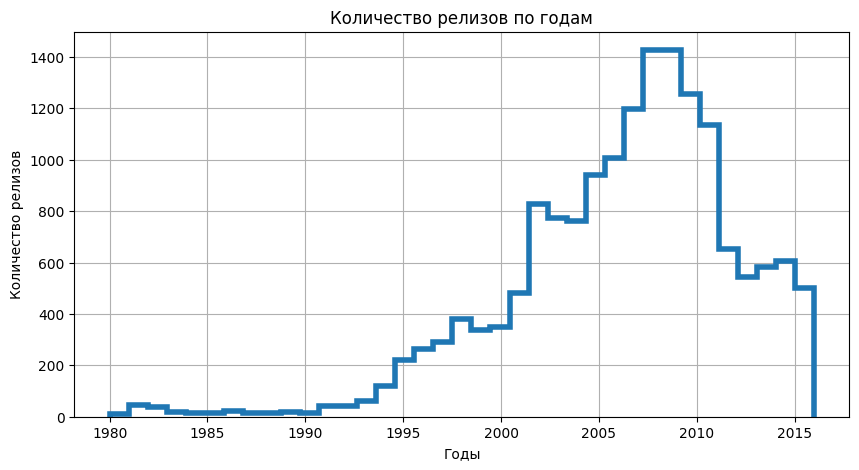

In [38]:
games['year_of_release'].plot(kind='hist', histtype='step', linewidth=4,
                              bins=37, figsize=(10,5), grid=True, title = 'Количество релизов по годам')

plt.xlabel('Годы')
plt.ylabel('Количество релизов')
plt.show()

In [39]:
# Посчитаю рост релизов за период с 1994 по 2008 для вывода:
(games[games['year_of_release']== 2008]['year_of_release'].count() / 
 games[games['year_of_release']== 1994]['year_of_release'].count() -1) * 100

1079.3388429752065

**Вывод:**

Первые игры появились в 1980-х годах, но до первой половины 90-ых выходило сравнительно немного игр. В середине 90-ых началось развитие чипов и производственных мощностей, стали выходить не только текстовые игры, но уже стала развиваться графика. Почти до конца нулевых количество игровых релизов существенно расло, достигнув пика в 2008 году. Общий рост релизов за период 1994 - 2008 (первый год, когда количество выпущенных игр перевалило за 100) составил ~1079%. С 2008 года наблюдается спад релизов, предположу, что это может объясняться двумя факторами:

1. Развитием мобильных игр и переходом производственных мощностей в нишу мобильных игр
2. Усложнением разработки игр - если раньше для разработки игры довольно было одной небольшой команды, то теперь нужно в разы больше людей и сам цикл разработки стал более сложным и долгим.

### Продажи по платформам
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [40]:
# Выведу ТОП платформ по суммарным продажам за всё время:
games_top = games.groupby('platform')\
                .agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index().head(6)
# В переменную запишу список платформ, в срезе при построении графика буду обращаться к этой переменной:
games_top_list = games_top['platform']
games_top
# Взял ТОП-6 платформ, так как следующая платформа по убыванию более чем в два раза меньше по объёму продаж

,platform,total_sales
0,ps2,"1,233.56"
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58


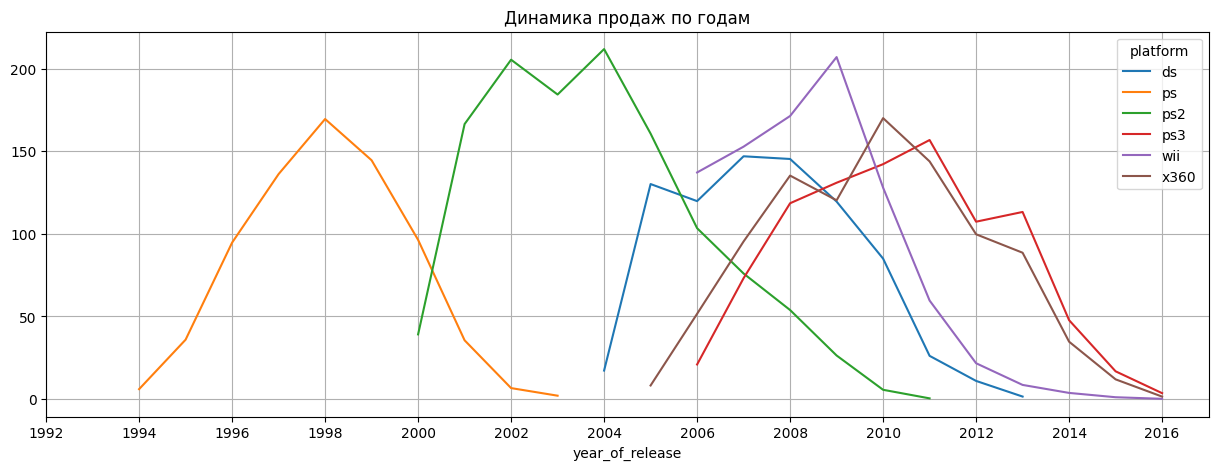

In [41]:
# Возьму срез популяции по платформам из списка ТОП платформ
(games.query('platform in @games_top_list')
    .pivot_table(index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind = 'line', grid=True, figsize=(15,5), 
        xlim=(1993, 2017), title='Динамика продаж по годам')
)
plt.xticks(np.arange(min(games['year_of_release']+12), max(games['year_of_release'])+1, 2))
plt.show()

**Вывод:**

Платформы в среднем живут около 10 лет, выходя на пик через 2-3 года после запуска. Выглядит логичным, так как за 10 лет технологии существенно провигаются вперёд. 

### Актуализация периода

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

* Не учитывайте в работе данные за предыдущие годы.

In [42]:
games_act = copy.deepcopy(games.loc[(games['year_of_release'] >= 2014)])

**Вывод:**

В предыдущем пункте я выявил жизненный цикл игровой платформы - около 10 лет, для дальнейшего анализа буду использовать данные по играм, вышедшим в 2014 году и позже. Так как это ориентировочно первая треть цикла платформы, когда она выходит на пик. Таким образом следующий год должен быть прибыльным в разрезе данной платформы.

### Платформы - лидеры по продажам
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [43]:
# Выведу ТОП платформ по суммарным продажам за актуальный период:
games_act_top = games_act.groupby('platform')\
                .agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index().head(5)
# В переменную запишу список платформ, в срезе при построении графика буду обращаться к этой переменной:
games_act_top_list = games_act_top['platform']
games_act_top

,platform,total_sales
0,ps4,288.15
1,xone,140.36
2,3ds,86.68
3,ps3,68.18
4,x360,48.22


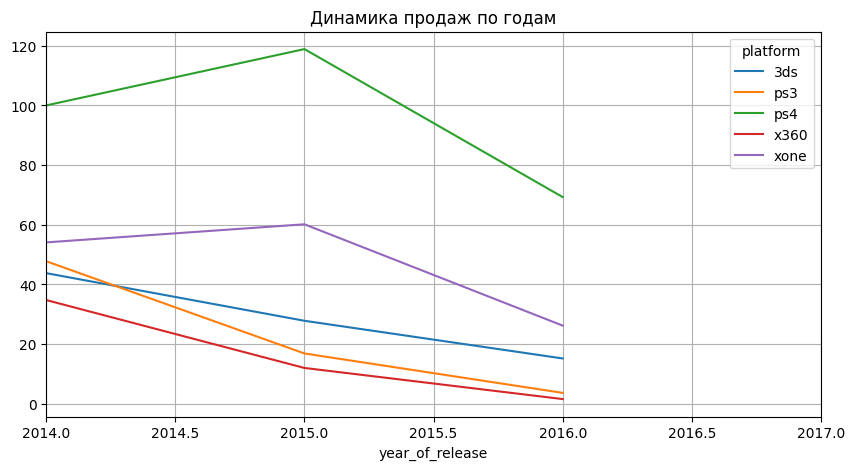

In [44]:
# Возьму срез популяции по платформам из списка ТОП платформ
(games_act.query('platform in @games_act_top_list')
    .pivot_table(index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind = 'line', grid=True, figsize=(10,5), 
        xlim=(2014, 2017), title='Динамика продаж по годам')
)
plt.show()

**Вывод:**

Выявлено 5 платформ-лидера по продажам - PS4, XOne, 3DS (Nintendo), PS3 и X360. Однако лидерство платформ PS3 и X360 обусловлено былыми заслугами и к 2016 году они в той или иной степени почти ушли с рынка. На текущий момент 2 платформы претендуют на роль лидеров в 2017 году с учётом того, что данные за 2016 год неполные: PS4, XOne и 3DS.

Наблюдение в рамках общего понимания игровой индустрии за наблюдаемый период.

### Глобальные продажи игр по платформам

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [45]:
# Напишу функцию для сортировки групп на диаграмме размаха по убыванию значения верхнего уса диаграммы (3 квартиля * 1.5)
def boxplot_sorted(games_act, by, column, rot=0):
    df = pd.DataFrame({col:vals[column] for col, vals in games_act.groupby(by)})
    meds = df.median().sort_values(ascending=False) # для сортироваки по медиане
    qnt = (df.quantile(0.75) * 1.5).sort_values(ascending=False) # для сортировки по 3 квартилю * 1.5
    total = df.sum().sort_values(ascending=False) # для сортировке посумме продаж
    return df[meds.index].boxplot(rot=rot, return_type="axes", figsize=(12,6))

In [46]:
# Допишу функцию, чтобы отсечь выбросы для более наглядного отображения:
def boxplot_sorted_wo_out(games_act, by, column, rot=0):
    df = pd.DataFrame({col:vals[column] for col, vals in games_act.groupby(by)})
    meds = df.median().sort_values(ascending=False) # для сортироваки по медиане
    qnt = (df.quantile(0.75) * 1.5).sort_values(ascending=False) # для сортировки по 3 квартилю * 1.5
    total = df.sum().sort_values(ascending=False) # для сортировке посумме продаж
    return df[meds.index].boxplot(rot=rot, return_type="axes", figsize=(12,6)).set_ylim(0, 1.8)

C:\Users\Павел\AppData\Local\Temp\ipykernel_9992\2208092639.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df = pd.DataFrame({col:vals[column] for col, vals in games_act.groupby(by)})


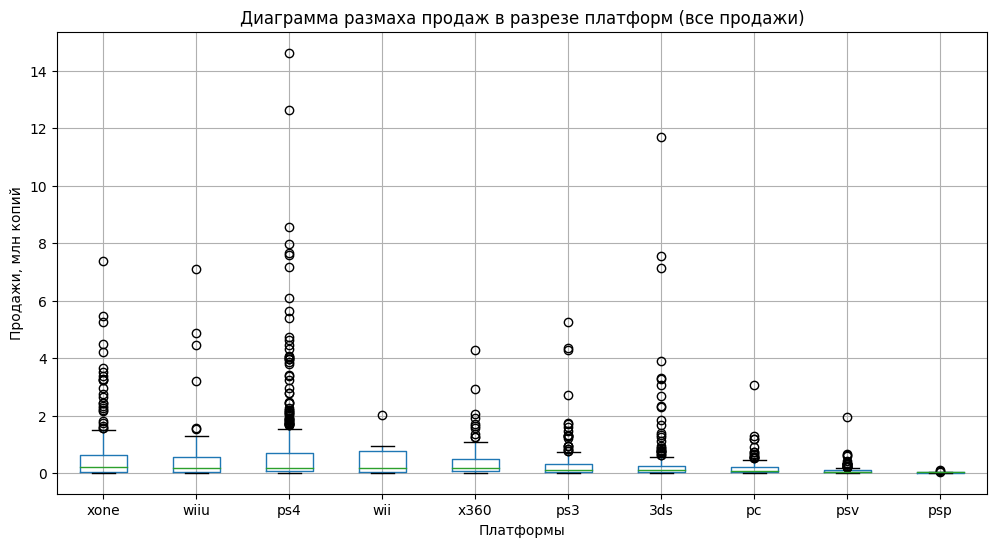

In [47]:
boxplot_sorted(games_act, by = ['platform'], column = 'total_sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Диаграмма размаха продаж в разрезе платформ (все продажи)')

plt.show()

C:\Users\Павел\AppData\Local\Temp\ipykernel_9992\1160319054.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df = pd.DataFrame({col:vals[column] for col, vals in games_act.groupby(by)})


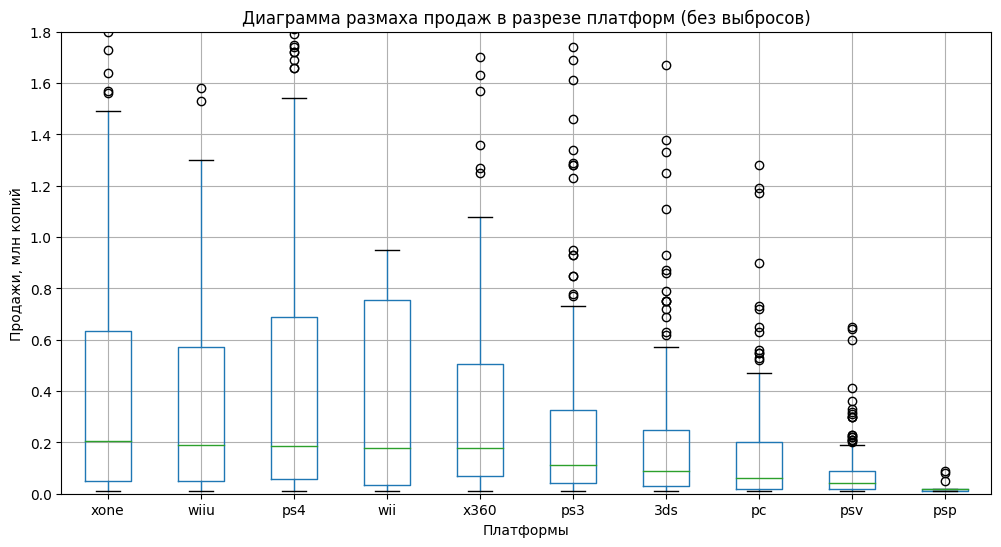

In [48]:
boxplot_sorted_wo_out(games_act, by = ['platform'], column = 'total_sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Диаграмма размаха продаж в разрезе платформ (без выбросов)')

plt.show()

**Вывод:**

Среди глобальных продаж по платформам за период с 2014 по 2016гг. отмечу:
* Распределение по убыванию медианного значения отличается от распределения по совокупным продажам - в ТОП-5 платформах также присутствуют XOne, PS4 и X360, однако вместо 3DS и PS3 в ТОП-5 вошли WIU и Wii;
* Данные платформы примерно равны по медианному значению - около 0.2 млн копий;
* XOne и PS4 - с максимальными наблюдаемыми значениями (3 квартиль * 1.5) в районе 1.5 млн копий, это самый лучший результат по платформам
* 3DS, PS3, которые вошли в ТОП-5, имею бОльшее количество выбросов, их медианы и максимальные наблюдаемые значения существенно ниже

Прочие платформы в порядке убывания по продажам относительно много уступают первой четвёрке. 

### Отзывы пользователей и критиков
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

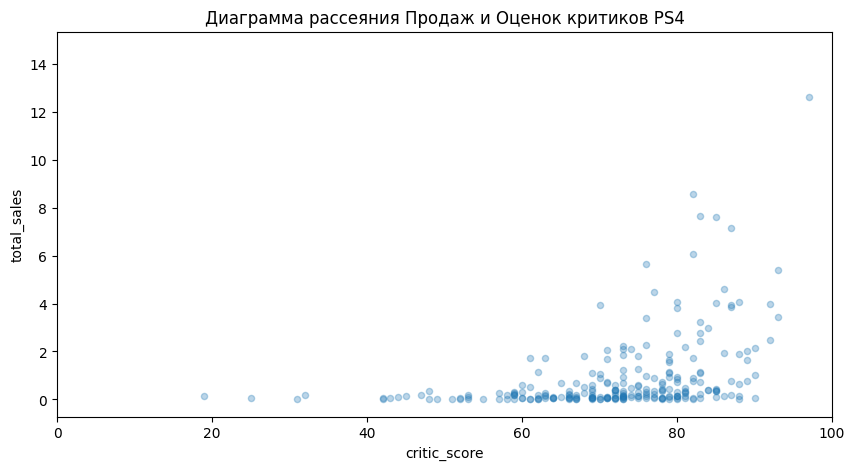

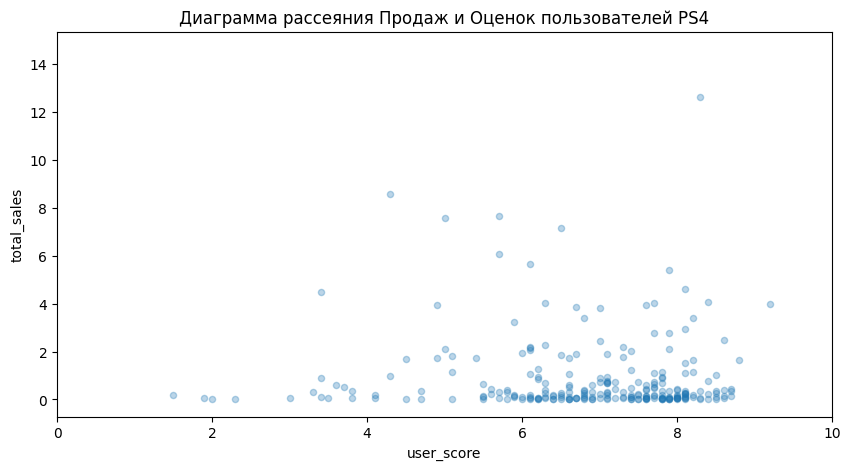

In [49]:
# Построю диаграмму рассеяния продаж и отзывами критиков
plat = 'ps4'
(games_act.query('platform == @plat')
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5),
    title='Диаграмма рассеяния Продаж и Оценок критиков PS4').set_xlim(0, 100)
)

# Построю диаграмму рассеяния продаж и отзывами пользователей. 
# Так как заменял часть данных на -1 (пропуски) и -2 (tbd) задам оси X ограничения от 0 до 10 
(games_act.query('platform == @plat')
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5),
         title='Диаграмма рассеяния Продаж и Оценок пользователей PS4').set_xlim(0, 10)
)

plt.show()

In [50]:
# Передам переменной нужные столбцы для построения корреляции:
correlation = copy.deepcopy(games_act[['platform', 'total_sales', 'critic_score', 'user_score']])
(correlation.query('platform == "ps4"').corr().style.background_gradient(cmap='YlOrBr')
)

C:\Users\Павел\AppData\Local\Temp\ipykernel_9992\2069384587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (correlation.query('platform == "ps4"').corr().style.background_gradient(cmap='YlOrBr')


,total_sales,critic_score,user_score
total_sales,1.000000,0.210847,0.105388
critic_score,0.210847,1.000000,0.906629
user_score,0.105388,0.906629,1.000000


**Вывод:**

На графиках рассеяния прослеживается прямая связь между оценками (как пользователей так и критиков) и продажами игр. На графике с критиками больше заметен тренд на увеличение продаж при хороших оценках.
Матрица корреляции подтверждает, что данные корреляции слабые (0.2 между продажами и оценками критиков и 0.1 между продажами и оценками пользователями). Также отмечу, что есть прямая сильная связь между критиками и пользователями ~0.9.

###  Продажи и рейтинги на других платформах
Соотнесите выводы с продажами игр на других платформах.

Построю диаграммы рассеяния по другим выборочным платформам - XOne и 3DS

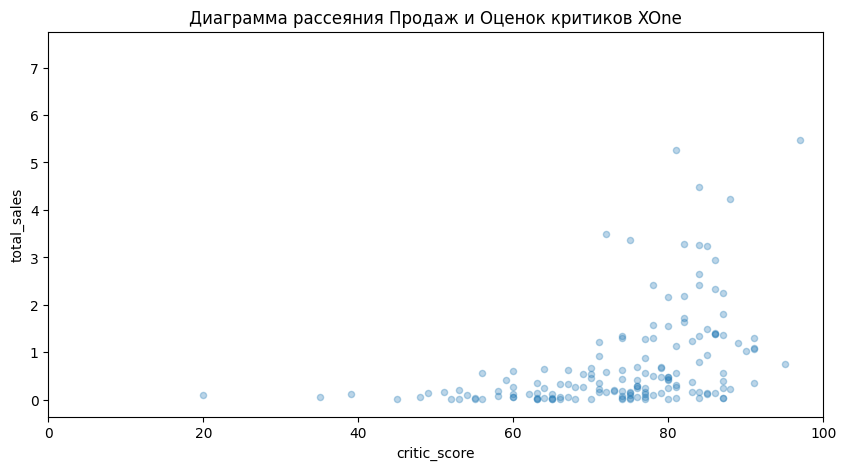

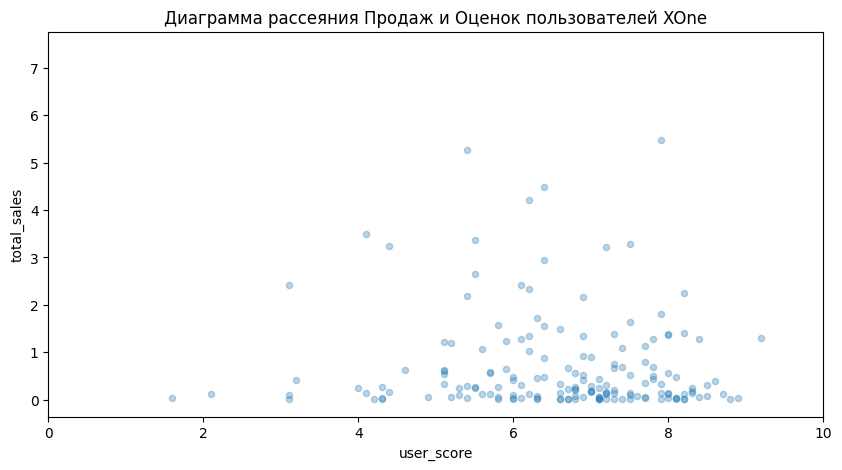

In [51]:
# Построю диаграмму рассеяния продаж и отзывами критиков по платформе XOne
plat = 'xone'
(games_act.query('platform == @plat')
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,  figsize=(10,5),
    title='Диаграмма рассеяния Продаж и Оценок критиков XOne').set_xlim(0, 100)
)

# Построю диаграмму рассеяния продаж и отзывами пользователей
(games_act.query('platform == @plat')
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5),
         title='Диаграмма рассеяния Продаж и Оценок пользователей XOne').set_xlim(0, 10)
)

plt.show()

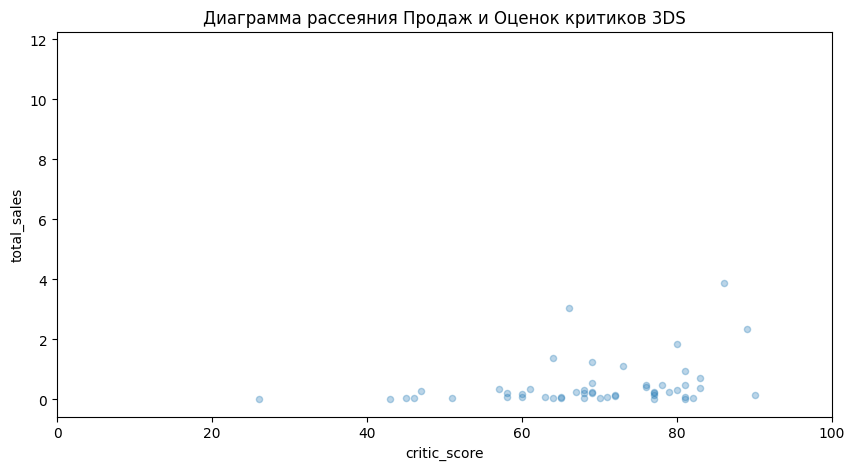

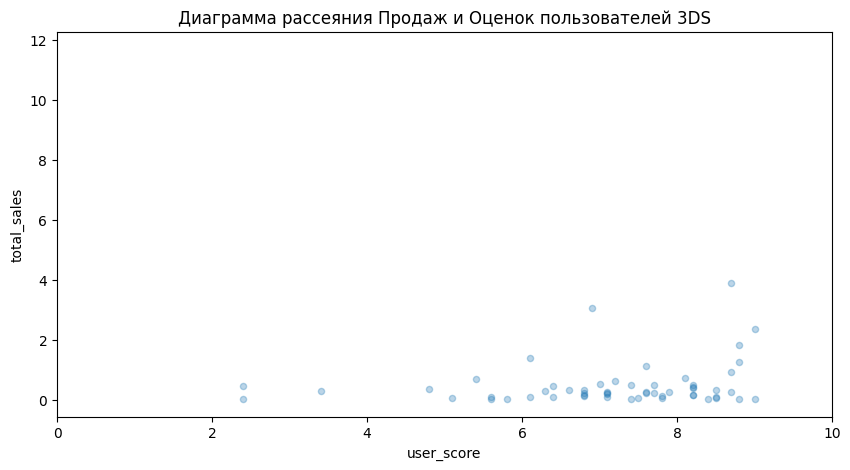

In [52]:
# Построю диаграмму рассеяния продаж и отзывами критиков по платформе 3DS
plat = '3ds'
(games_act.query('platform == @plat')
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,  figsize=(10,5),
    title='Диаграмма рассеяния Продаж и Оценок критиков 3DS').set_xlim(0, 100)
)

# Построю диаграмму рассеяния продаж и отзывами пользователей
(games_act.query('platform == @plat')
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5),
         title='Диаграмма рассеяния Продаж и Оценок пользователей 3DS').set_xlim(0, 10)
)

plt.show()

**Вывод:**

Зависимость продаж и оценок по платформам могут немного отличаться, но общая картина и тренд схожие - при хороших оценках продажи в среднем выше.

<div class="alert alert-anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
     <br /> Общая проблема для раздела — участие отрицательных (заглушки) значений в расчетах ...

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Чтобы построить проданных копий по жанрам, соберу сводную таблицу, а затем построю график bar chart.

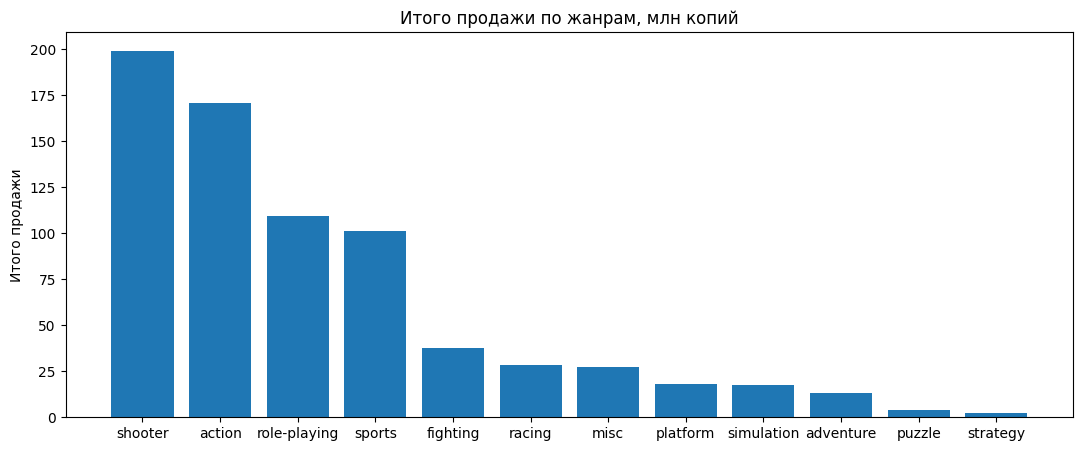

In [53]:
# Собираю пивот:
games_act_genre_pvt = games_act.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
                .sort_values(by='total_sales', ascending=False)
# Формирую список жанров для графика:
genre_list = games_act['genre'].unique()

# Bar chart:
fig = plt.figure(figsize = (13, 5))
plt.bar(genre_list, games_act_genre_pvt['total_sales'])

plt.title('Итого продажи по жанрам, млн копий')
plt.ylabel('Итого продажи')
plt.show()

C:\Users\Павел\AppData\Local\Temp\ipykernel_9992\2208092639.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df = pd.DataFrame({col:vals[column] for col, vals in games_act.groupby(by)})


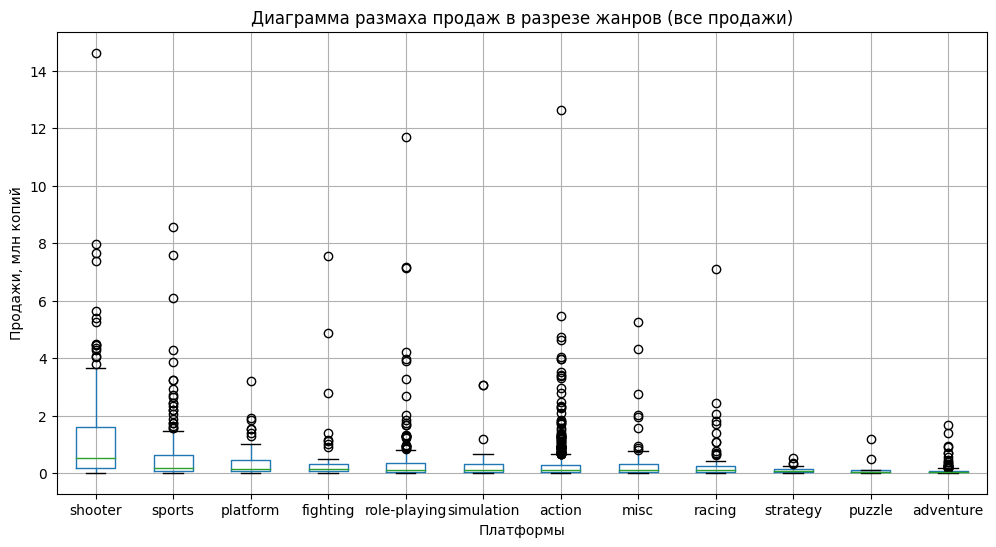

In [54]:
# Построю диаграмму размаха по жанрам по аналогии с платформами, воспользуюсь написанной функцией:
boxplot_sorted(games_act, by = ['genre'], column = 'total_sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Диаграмма размаха продаж в разрезе жанров (все продажи)')

plt.show()

На диаграмме размаха продаж по жанрам довольно много выбросов, построю график, ограничив масштаб значения продаж до 1.8 млн копий, верхний ус шутеров будет выше графика, зато другие жанры будут видны.

C:\Users\Павел\AppData\Local\Temp\ipykernel_9992\1160319054.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df = pd.DataFrame({col:vals[column] for col, vals in games_act.groupby(by)})


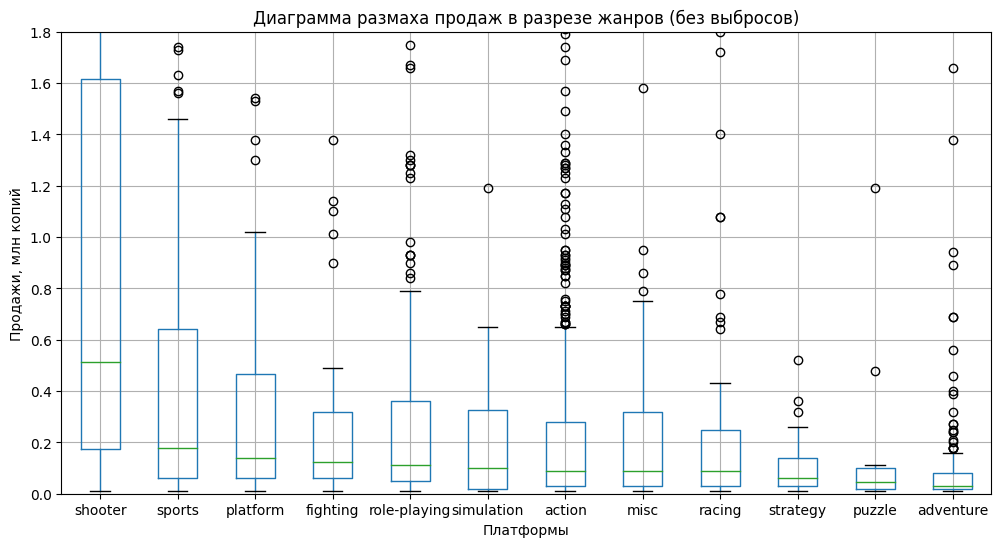

In [55]:
boxplot_sorted_wo_out(games_act, by = ['genre'], column = 'total_sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Диаграмма размаха продаж в разрезе жанров (без выбросов)')

plt.show()

#### Топ игры по жанрам

Для того, чтобы сделать вывод в каком жанре бОльший ряд успешных игр, посчитаю сколько игр жанра находятся выше 3 квантиля и посчитаю их долю от соответствующего жанра.

In [56]:
# Создам список с жанрами в порядке убывания по медианному значению:
games_act_genres = ['shooter', 'sports', 'platform', 'fighting', 'role-playing', 'simulation', 'action',
                    'misc', 'racing', 'strategy', 'puzzle', 'adventure']
# Напишу функцию, которая подсчитает сумму продаж игр выше 3 квантиля и их долю от общих продаж в жанре
def genre_count():
    genre_sum = []
    genre_amount = []
    genre_share = []
    for gen in games_act_genres:
        # Определяю пороговое значение для жанра (3 квантиль или медиана):
        qnt = games_act[games_act['genre'] == gen]['total_sales'].quantile(0.75)
        med = games_act[games_act['genre'] == gen]['total_sales'].median()
        # Сумма игр, выше порогового значения (медианы):
        sum_total = games_act[(games_act['genre'] == gen) 
                         & (games_act['total_sales'] > med)]['total_sales'].sum()
        amount = games_act[(games_act['genre'] == gen) 
                         & (games_act['total_sales'] > med)]['total_sales'].count()
        # Доля от продаж игр в жанре:
        share = games_act[(games_act['genre'] == gen) 
                          & (games_act['total_sales'] > med)]['total_sales'].sum()\
        / games_act[games_act['genre'] == gen]['total_sales'].sum()
        
        genre_sum.append(sum_total)
        genre_amount.append(amount)
        genre_share.append(share)
    return pd.DataFrame(index=['Продажи игр выше порогового значения', 'Число уникальных игр',
                               'Доля от продаж в жанре'],
                        data = [genre_sum, genre_amount, genre_share], columns = games_act_genres)

In [57]:
# Выведу результат функции:
genre_count()

,shooter,sports,platform,fighting,role-playing,simulation,action,misc,racing,strategy,puzzle,adventure
Продажи игр выше порогового значения,158.09,103.62,16.77,26.46,95.45,12.44,187.65,35.45,26.12,3.27,2.07,15.77
Число уникальных игр,64.00,80.00,18.00,30.00,109.00,21.00,299.00,55.00,34.00,16.00,7.00,86.00
Доля от продаж в жанре,0.92,0.95,0.93,0.94,0.94,0.95,0.94,0.94,0.95,0.83,0.94,0.90


In [58]:
# Просмотр игр выше порогового значения по жанрам (жанр необходимо прописывать в переменной gen):
gen = 'shooter'
qnt = games_act[games_act['genre'] == gen]['total_sales'].quantile(0.75)
med = games_act[games_act['genre'] == gen]['total_sales'].median()
games_act[(games_act['genre'] == gen) & (games_act['total_sales'] > med)].head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.00,out_of_rating,14.63
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1.00,out_of_rating,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.70,m,7.66
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,-1,-1.00,out_of_rating,7.39


**Вывод:**

Самое большое медианное значение у жанра - Shooter, наименьшее - у Adventure.
Примечательно, что в жанрах-лидерах с большим отрывом лидируют игры на платформе PS4. Данные платформы наиболее заточены под игры жанров Shooter, Sports.

Жанры, генерирующие наибольшее число продаж, а следовательно и более длинный ряд успешно продающихся игр - Action, Shooter, Sprts и Role-Playing.

Отдельно отмечу, что игра FIFA Soccer почему-то попала в категорию Action, хотя это спортивный симмулятор.

## Составьте портрет пользователя каждого региона
<a id='section_id4'></a>

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для составления портрета пользователя каждого региона, уберу из датафрейма устаревшие версии платформ, так как они нерелевантны для прогнозирования дальнейших продаж.

In [59]:
# Посмотрю распределение игр по платформам:
games_act['platform'].value_counts()

ps4     376
psv     295
xone    228
ps3     219
3ds     212
pc      151
x360    111
wiiu     73
psp      13
wii      11
Name: platform, dtype: int64

In [60]:
# В актуальном периоде (2014-2016гг.) есть устаревшие версии одной платформы, 
# некоторые существенно сдают позиции - Wii, PSP, X360, а ps3 ещё держится в топе, уберу эти платформы из датафрейма
games_rel = copy.deepcopy(games_act.loc[(games_act['platform'] != 'ps3') 
                                    & (games_act['platform'] != 'x360')
                                    & (games_act['platform'] != 'psp')
                                    & (games_act['platform'] != 'wii')])

games_rel['platform'].value_counts()

ps4     376
psv     295
xone    228
3ds     212
pc      151
wiiu     73
Name: platform, dtype: int64

### Популярные платформы
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

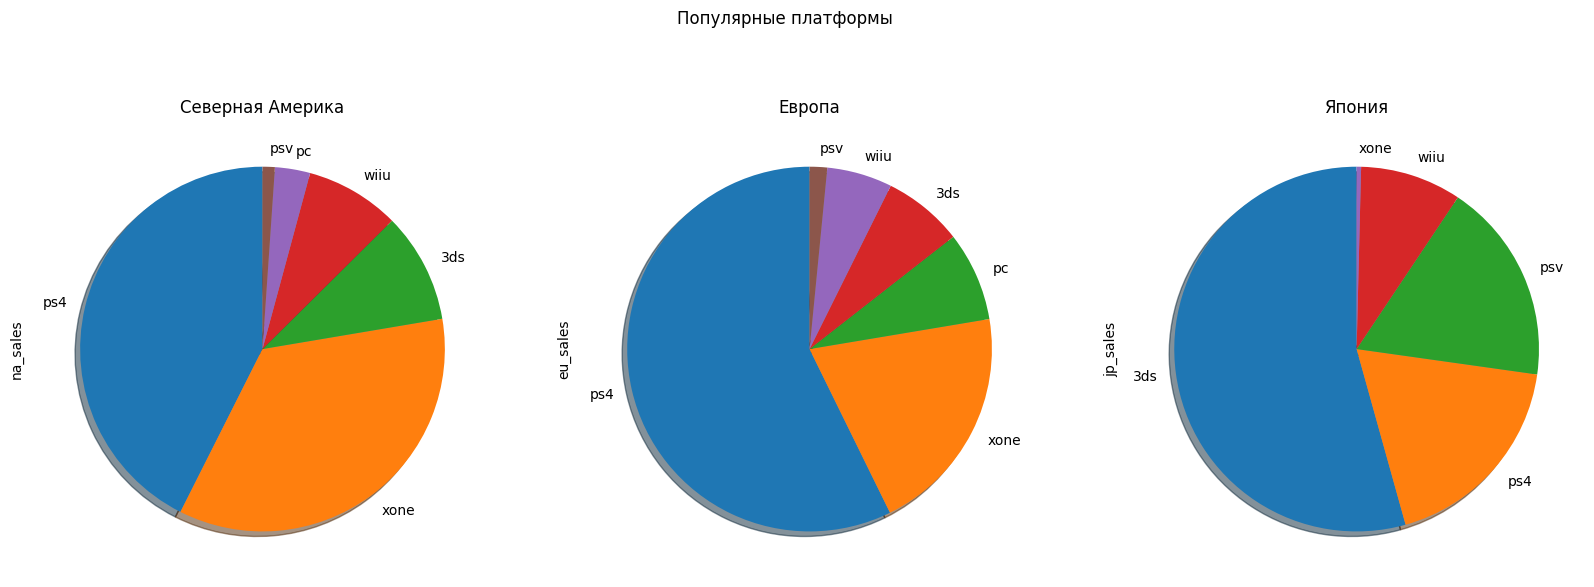

In [61]:
# В датафрейме осталось 6 платформ, чтобы не терять данные, добавлю 6-ую в дополнение к заданию
# Построю 3 графика топ-6 популярных платформ в разрезе 3 регионов продаж:

fig = plt.figure(figsize=(20, 7))
fig.suptitle('Популярные платформы')

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

(games_rel.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
             .plot(kind = 'pie', ax = ax_1, legend = False, subplots=True, shadow=True, startangle=90))

(games_rel.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
             .plot(kind='pie', ax = ax_2, legend = False, subplots=True, shadow=True, startangle=90))

(games_rel.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
             .plot(kind='pie', ax = ax_3, legend = False, subplots=True, shadow=True, startangle=90))

ax_1.set(title = 'Северная Америка')
ax_2.set(title = 'Европа')
ax_3.set(title = 'Япония')

plt.show()

**Вывод:**

ТОП-3 платформ по продажам игр в Северной Америке и Европе одни и те же, отличается распределение мест, это может быть обусловленно региональными скидками или популярностью непосредственно самих платформ. Также в Северной Америке большую долю занимает платформа XOne, которая производится в США, вытесняя PS4.

В Японии популярны игры на платформе 3DS, где данная платформа выпускается, а также в отличие от других регионов, платформа XOne находится на 5 месте, занима совсем небольшую долю рынка.

### Популярные жанры
Самые популярные жанры (топ-5). Поясните разницу.

In [62]:
# Посмотрю распределение игр по жанрам
games_act['genre'].value_counts()

action          619
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: genre, dtype: int64

In [63]:
# Добавлю колонки с жанрами по регионам, в которых соберу жанры вне ТОП-5 в категорию прочие жанры:
games_act['top_genres_na'] = games_act['genre']
games_act['top_genres_eu'] = games_act['genre']
games_act['top_genres_jp'] = games_act['genre']

#Функция категоризации жанров вне ТОП-5 в прочие: 
def replace_other(region, category_name, category_other):
    for category_name in category_name:
        games_act[region] = games_act[region].replace(category_name, category_other)

genre_other = 'other_genres'

genre_name_na = ['fighting', 'racing', 'platform', 'adventure', 'simulation', 'strategy', 'puzzle']
genre_name_eu = ['misc', 'simulation', 'platform', 'fighting', 'adventure', 'strategy', 'puzzle']
genre_name_jp = ['adventure', 'sports', 'platform', 'simulation', 'racing', 'strategy', 'puzzle']

# Применение функции:
replace_other('top_genres_na', genre_name_na, genre_other)
replace_other('top_genres_eu', genre_name_eu, genre_other)
replace_other('top_genres_jp', genre_name_jp, genre_other)

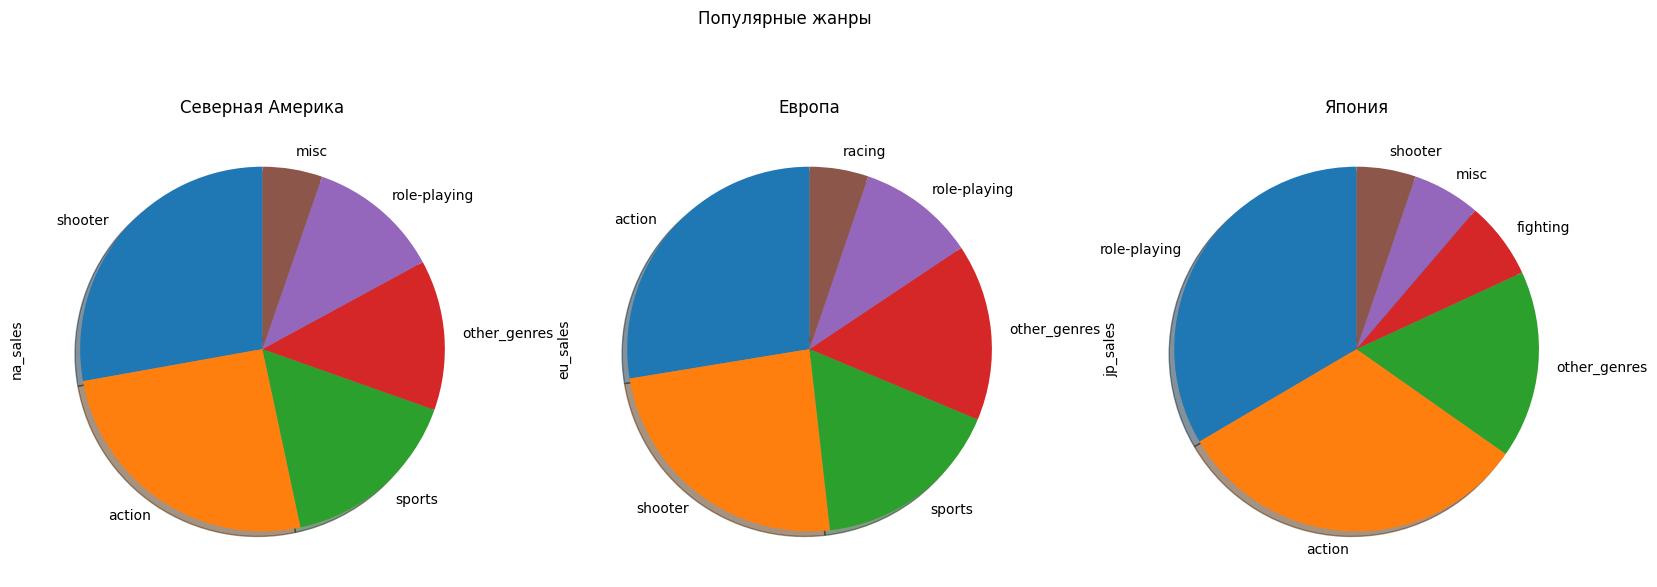

In [64]:
# Построю 3 графика топ-5 популярных жанров в разрезе 3 регионов продаж + прочие жанры:

fig = plt.figure(figsize=(20, 7))
fig.suptitle('Популярные жанры')

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

(games_act.groupby(by='top_genres_na').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
             .plot(kind = 'pie', ax = ax_1, legend = False, subplots=True, shadow=True, startangle=90))

(games_act.groupby(by='top_genres_eu').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
             .plot(kind='pie', ax = ax_2, legend = False, subplots=True, shadow=True, startangle=90))

(games_act.groupby(by='top_genres_jp').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
             .plot(kind='pie', ax = ax_3, legend = False, subplots=True, shadow=True, startangle=90))

ax_1.set(title = 'Северная Америка')
ax_2.set(title = 'Европа')
ax_3.set(title = 'Япония')

plt.show()

**Вывод:**

Распределение игр по жанрам в регионах Северной Америки и Европе совпадает за исключением жанров Misc и Racing, первый более популярен в Северной Америке, второй - в Европе. Вероятно это объясняется схожим менталитетом.

В Японии на первом месте располагаются игры в жанре Role-Playing (в частности разные варианты игры Pokemon), с топами Северной Америки и Европы совпадают только игры в жанре Action и Shooter. Жанры Fighting, Misc и Shooter существенно уступают в популярности первым двум жанрам.

### Влияние рейтинга ESRB на продажи 
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
# Поссмотрю какие рейтинги представлены в датафрейме и как распределяются игры между ними:
games_act.value_counts('rating')

rating
out_of_rating    749
t                271
m                265
e                219
e10+             185
dtype: int64

**Описание рейтингов:**
1. **E** - everyone, для всех. Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
2. **E10+** - everyone above 10, для всех от 10 лет и старше. Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
3. **T** - teen, для подростков. Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
4. **M** - mature 17+, для взрослых. Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
5. **EC** - early childhood, для детей младшего возраста
6. **RP** - rating pending, рейтинг ожидается. Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

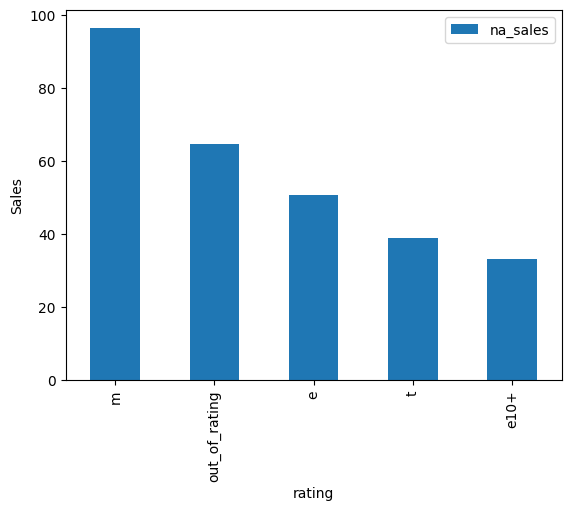

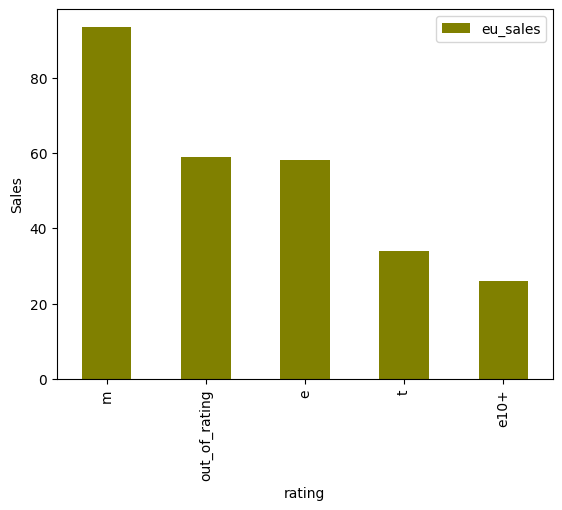

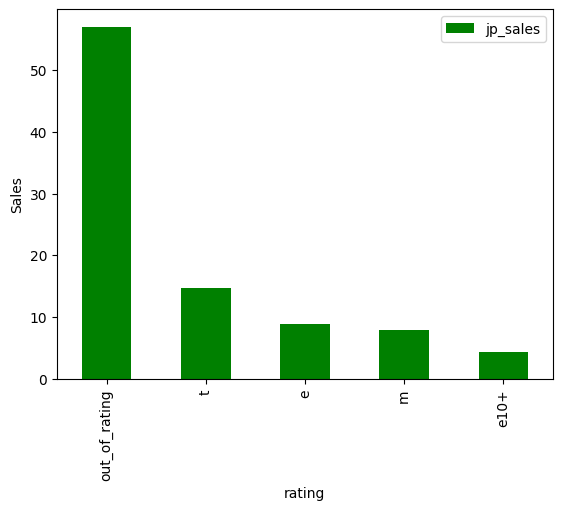

In [66]:
games_act.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.ylabel('Sales')
games_act.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)\
    .plot(kind='bar', color='olive')
plt.ylabel('Sales')
games_act.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)\
    .plot(kind='bar', color='green')
plt.ylabel('Sales')
plt.show()

**Вывод:**

Рейтинг влияет на продажи в разных регионах, отличия между регионами Северной Америки и Европы по распределению рейтингов незначительное - игры с рейтингом Е10+ чуть более популярны по сравнению с играми категории Т в Северной Америки, чем в Европе.

В Японии, не беря в расчёт категорию "Вне рейтинга", на первом месте игры для подростков, далее располагаются игры для всех возрастов и, с небольшим отставанием, - для взрослых.

## Проверка гипотез
<a id='section_id5'></a>
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.


При проверке гипотез буду использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

### Гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы:

- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [67]:
xone = games_act[(games_act['platform'] == 'xone') & (games_act['user_score'] >= 0)]['user_score']
pc = games_act[(games_act['platform'] == 'pc') & (games_act['user_score'] >= 0)]['user_score']

alpha = 0.05
results = st.ttest_ind(xone, pc)

print('p-value (уровень значимости):', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value (уровень значимости): 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью в 10% такое или большее различие можно получить случайно. Эта вероятность превышает заданный пороговый уровень в 5%, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

In [68]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


Несмотря на то, что средний чек пришедших из разных каналов и неодинаков, с вероятностью в почти 19% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.

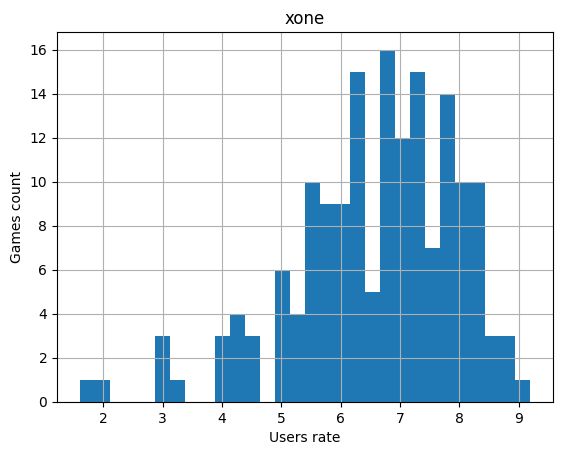

In [69]:
# Построю гистограмму по плаформе XOne:
xone.plot(kind='hist', bins=30, grid=True, title='xone')
plt.xlabel('Users rate')
plt.ylabel('Games count')

plt.show()

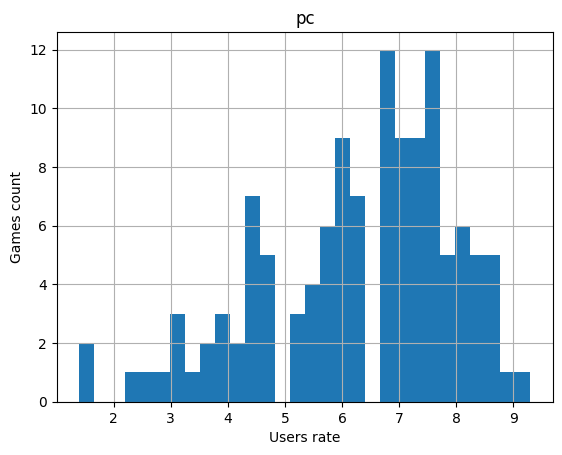

In [70]:
# Построю гистограмму по плаформе PC:
pc.plot(kind='hist', bins=30, grid=True, title='pc')
plt.xlabel('Users rate')
plt.ylabel('Games count')

plt.show()

**Вывод:**
Между выборками нет статистически значимых различий. Визуально графики схожи.

### Гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы:
* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: средний пользовательский рейтинг жанров Action и Sports различается

In [71]:
action = games_act[(games_act['genre'] == 'action') & (games_act['user_score'] >= 0)]['user_score']
sports = games_act[(games_act['genre'] == 'sports') & (games_act['user_score'] >= 0)]['user_score']

alpha = 0.05
results = st.ttest_ind(action, sports)

print('p-value(уровень значимости):', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value(уровень значимости): 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью меньше 1%(очень маловероятно), такое различие можно получить случайно. Эта вероятность в пределах заданного уровеня в 5%, таким образом, между средними пользовательскими рейтингами есть статистически значимые различия.

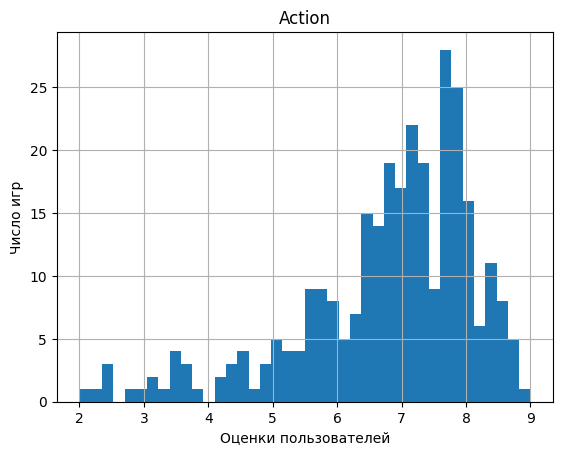

In [72]:
# Построю гистограмму по жанру Action:
action.plot(kind='hist', bins=40, grid=True, title='Action')
plt.xlabel('Оценки пользователей')
plt.ylabel('Число игр')

plt.show()

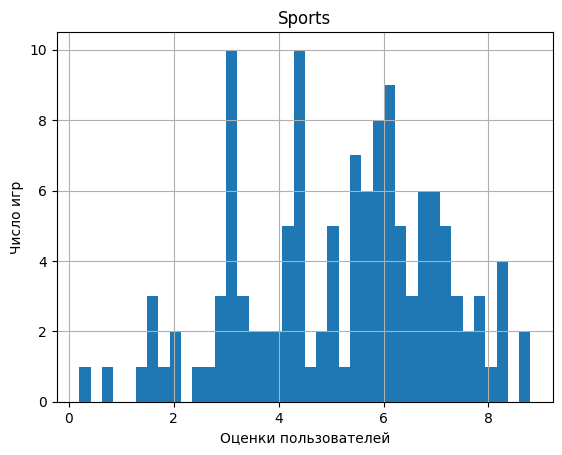

In [73]:
# Построю гистограмму по жанру Sports:
sports.plot(kind='hist', bins=40, grid=True, title='Sports')
plt.xlabel('Оценки пользователей')
plt.ylabel('Число игр')

plt.show()

**Вывод:**
Между выборками есть статистически значимые различия. Визуально на графиках это тоже заметно.

**Ссылки на разделы в тетрадке:**

1. [Обзор данных](#section_id)

2. [Предобработка данных](#section_id2)

3. [Исследовательский анализ данных](#section_id3)

4. [Портрет пользователя](#section_id4)

## Вывод:

**Описание данных**

Для проведения исследования использовался датасет с продажами игр.

**Предобработка данных**

В ходе предобработки данных были выполнены следущие шаги:
1. удалены строки с пропусками в колонках `name`, `year_of_release`
2. обработаны пропуски в колонке `user_score` - пропуски заменены на -1, значения 'tbd' на -2
3. изменены типы данных 
4. рассчитаны суммарные продажи по 3 регионам

**Анализ данных**

1. Число релизов расло с середины 1990-х до 2008 г. с развитием технологий, с 2008 года наблюдается спад числа релизов, предположу, что в связи с двумя факторами:

* Развитием мобильных игр и переход производственных мощностей в нишу мобильных игр
* Усложнением разработки игр - если раньше для разработки игры довольно было одной небольшой команды, то теперь нужно в разы больше людей и сам цикл разработки стал более сложным и долгим.

2. Платформы в среднем живут около 10 лет, выходя на пик через 2-3 года после запуска. Выглядит логичным, так как за 10 лет технологии существенно провигаются вперёд.

3. В предыдущем пункте я выявил жизненный цикл игровой платформы - около 10 лет, для дальнейшего анализа буду использовать данные по играм, вышедшим в 2014 году и позже. Так как это ориентировочно первая треть цикла платформы, когда она выходит на пик. Таким образом следующий год должен быть прибыльным в разрезе данной платформы.

4. Выявлено 5 платформ-лидера по продажам - PS4, XOne, 3DS (Nintendo), PS3 и X360. Однако лидерство платформ PS3 и X360 обусловлено былыми заслугами и к 2016 году они в той или иной степени почти ушли с рынка. На текущий момент 2 платформы претендуют на роль лидеров в 2017 году с учётом того, что данные за 2016 год неполные: PS4, XOne и 3DS.

5. Среди глобальных продаж по платформам за период с 2014 по 2016гг. отмечу:
* Распределение по убыванию медианного значения отличается от распределения по совокупным продажам - в ТОП-5 платформах также присутствуют XOne, PS4 и X360, однако вместо 3DS и PS3 в ТОП-5 вошли WIU и Wii;
* Данные платформы примерно равны по медианному значению - около 0.2 млн копий;
* XOne и PS4 - с максимальными наблюдаемыми значениями (3 квартиль * 1.5) в районе 1.5 млн копий, это самый лучший результат по платформам
* 3DS, PS3, которые вошли в ТОП-5, имею бОльшее количество выбросов, их медианы и максимальные наблюдаемые значения существенно ниже

Прочие платформы в порядке убывания по продажам относительно много уступают первой четвёрке.

6. На графиках рассеяния прослеживается прямая связь между оценками (как пользователей так и критиков) и продажами игр. На графике с критиками больше заметен тренд на увеличение продаж при хороших оценках.
Матрица корреляции подтверждает, что данные корреляции слабые (0.2 между продажами и оценками критиков и 0.1 между продажами и оценками пользователями). Также отмечу, что есть прямая сильная связь между критиками и пользователями ~0.9.

7. Зависимость продаж и оценок по платформам могут немного отличаться, но общая картина и тренд схожие - при хороших оценках продажи в среднем выше.

8. Самое большое медианное значение у жанра - Shooter, наименьшее - у Adventure.
Примечательно, что в жанрах-лидерах с большим отрывом лидируют игры на платформе PS4. Данные платформы наиболее заточены под игры жанров Shooter, Sports.

Жанры, генерирующие наибольшее число продаж, а следовательно и более длинный ряд успешно продающихся игр - Action, Shooter, Sprts и Role-Playing.

### Портрет пользователя - выводы

**1. Популярные платформы.**

ТОП-3 платформ по продажам игр в Северной Америке и Европе одни и те же, отличается распределение мест, это может быть обусловленно региональными скидками или популярностью непосредственно самих платформ. Также в Северной Америке большую долю занимает платформа XOne, которая производится в США, вытесняя PS4.

В Японии популярны игры на платформе 3DS, где данная платформа выпускается, а также в отличие от других регионов, платформа XOne находится на 5 месте, занима совсем небольшую долю рынка.

**2. Популярные жанры.**

Распределение игр по жанрам в регионах Северной Америки и Европе совпадает за исключением жанров Misc и Racing, первый более популярен в Северной Америке, второй - в Европе. Вероятно это объясняется схожим менталитетом.

В Японии на первом месте располагаются игры в жанре Role-Playing (в частности разные варианты игры Pokemon), с топами Северной Америки и Европы совпадают только игры в жанре Action и Shooter. Жанры Fighting, Misc и Shooter существенно уступают в популярности первым двум жанрам.

**3. Влияние рейтинга ESRB на продажи.**

Рейтинг влияет на продажи в разных регионах, отличия между регионами Северной Америки и Европы по распределению рейтингов незначительное - игры с рейтингом Е10+ чуть более популярны по сравнению с играми категории Т в Северной Америки, чем в Европе.

В Японии, не беря в расчёт категорию "Вне рейтинга", на первом месте игры для подростков, далее располагаются игры для всех возрастов и, с небольшим отставанием, - для взрослых.

### Проверка гипотез - вывод

При проведении исследования выполнено два t-теста Стьюдента, так как сравниваемые выборки независимы между собой.

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформированы гипотезы:

H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый

H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [74]:
results = st.ttest_ind(xone, pc)

print('p-value (уровень значимости):', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value (уровень значимости): 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью в 10% такое или большее различие можно получить случайно. Эта вероятность превышает заданный пороговый уровень в 5%, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

**Вывод:**
Между выборками нет статистически значимых различий.

**2. Средние пользовательские рейтинги жанров Action и Sports разные**

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформированы гипотезы:
* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: средний пользовательский рейтинг жанров Action и Sports различается

In [75]:
results = st.ttest_ind(action, sports)

print('p-value (уровень значимости):', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value (уровень значимости): 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью меньше 1%(очень маловероятно), такое различие можно получить случайно. Эта вероятность в пределах заданного уровеня в 5%, таким образом, между средними пользовательскими рейтингами есть статистически значимые различия.

**Вывод:**
Между выборками есть статистически значимые различия.

### Общий вывод:

Количество релизов игр падает, начиная с 2009 года, потенциально это обусловлено развитием мобильных платформ.
При прогнозировании продаж на 2017 год стоит делать ставку на игры в жанрах Action и Role-Playing на платформах PS4 и XOne, чуть в меньшей степени на платформе 3DS по всем 3 регионам, а также, в зависимости от региона, целесообразно будет сфокусировать продажи игр в жанрах:
* Shooter, Action, Sports и Role-Playing - в Северной Америке и Европе
* Role-Playing, Action и Fighting - в Японии